In [1]:
import matplotlib.pyplot as plt
import sys, os
import h5py
import math
sys.path.append('/Users/maturino/jaxions/jaxions/scripts/')
import numpy as np
from pyaxions import jaxions as pa
import importlib

In [2]:
importlib.reload(pa)

<module 'pyaxions.jaxions' from '/Users/maturino/jaxions/jaxions/scripts/pyaxions/jaxions.py'>

In [3]:
cd ../../runs/testpow/

/Users/maturino/jaxions/runs/testpow


In [5]:
# finds m files recursively in the directory given
mfiles = pa.findmfiles('out')
print('%s - %s'%(mfiles[0],mfiles[-1]))

out/axion.m.10000 - out/m/axion.m.00109


In [7]:
# finds the address of the first m directory
mdir=pa.findmdir()
print(mdir)

./out/m/


In [8]:
# moves 100001 and 10000 files from m to m/.. [out]
pa.mv10001('./')

In [9]:
# displays attributes of an m file
pa.aximcontent(mfiles[2])

Attributes of file  <HDF5 file "axion.m.00000" (mode r)>
Field type: b'Saxion'
Precision: b'Single'
Size: 256
Depth: 256
Saxion mass: 1.5
Axion mass: 0.000316227766017
Physical size: 0.5
z: 0.1
zInitial: 0.1
zFinal: 4.5
nSteps: 20000
Current step: 0

[/ic/]
      Initial conditions: b'Smooth'
      Smoothing iterations: 50
      Smoothing constant: 0.143
      Axion zero mode: 0.2
      Configuration type: b'Axion n'

[/potential/]
      Lambda type: b'z2'
      Lambda: 294912.0
      VQcd type: b'None'
      Damping type: b'Rho'
      Evolution type: b'Full'
      nQcd: 7.0
      Gamma: 1.0
      Shift: 1.7763568394e-15
      Indi3: 1.0
      z Threshold: 100.0
      z Restore: 100.0



In [10]:
# gets attributes and data sets from a measurement file
# some new attributes are not yet implemented
pa.gm(mfiles[0],'help')

---------------------------------------------
gm help           
---------------------------------------------
ftype       Saxion/Axion      
ct/z        conformal time    
Size        Number of lattice points along 1D 
L           Phyiscal Box Length [ADM u.]     
massA       Axion mass    [ADM u.]     
massS       Saxion mass   [ADM u.]    
msa         Saxion mass*L/N           
eA          Energy Axion  [ADM u.]   
eS          Energy SAxion [ADM u.]   
eGA         Grad En Axion [ADM u.]   
eGxA        Grad x En Axion [ADM u.]   
eKA         Kin En Axion [ADM u.]   
eVA         Pot En Axion [ADM u.]   
stringN     String #points 
stwallN     Walls  #points   
stDens      String length/Volume [ADM u.]   
binconB     binned normalised log10 contrast         
binconBmax  maximum log10(contrast)         
binconBmin  maximum log10(contrast)         
binthetaB   binned normalised theta value        
binthetaBmax, binthetaBmin...   
kmax        maximum momentum [int] in the 3D grid 
       

In [11]:
# gets attributes and data sets from a measurement file
id = 50
print(pa.gm(mfiles[id],'ftype'))
print(pa.gm(mfiles[id],'ct')," ",pa.gm(mfiles[id],'z'))
print(pa.gm(mfiles[id],'Size'))
print(pa.gm(mfiles[id],'L'))
print(pa.gm(mfiles[id],'nqcd'))
print(pa.gm(mfiles[id],'delta'))
print(pa.gm(mfiles[id],'massA'))
print(pa.gm(mfiles[id],'massS'))
print(pa.gm(mfiles[id],'msa'))

print(pa.gm(mfiles[id],'eA'))
print(pa.gm(mfiles[id],'eS'))

print(pa.gm(mfiles[id],'stringN'))
print(pa.gm(mfiles[id],'stwallN'))
print(pa.gm(mfiles[id],'stDens'))

Axion
2.1289507171   2.1289507171
256
0.5
7.0
0.001953125
14.0792534939
768.0
1.5
0.67626640149
[gm] Warning: file contains no Saxion energy!, set to 0.
0.0
0.0
0.0
0.0


In [12]:
print('binconB ',pa.gm(mfiles[id],'binconB'))
print('binthetaB ',pa.gm(mfiles[id],'binconB'))

print('kmax ',pa.gm(mfiles[id],'kmax'))

print('nspK ',pa.gm(mfiles[id],'nspK')[:3])
print('nspG ',pa.gm(mfiles[id],'nspG')[:3])
print('nspV ',pa.gm(mfiles[id],'nspV')[:3])
print('nsp ',pa.gm(mfiles[id],'nsp')[:3])

print('psp ',pa.gm(mfiles[id],'psp')[:3])

binconB  [ 0.0349988  0.         0.        ...,  0.         0.         0.0349988]
binthetaB  [ 0.0349988  0.         0.        ...,  0.         0.         0.0349988]
kmax  222
nspK  [  1.12981365e-02   5.56685216e-13   1.54497786e-12]
nspG  [  0.00000000e+00   1.22086547e-13   6.26760956e-13]
nspV  [  1.36107743e-03   2.71059041e-13   6.46313688e-13]
nsp  [  1.26592139e-02   9.49830804e-13   2.81805250e-12]
psp  [  2.85835179e-02   4.32078862e-12   1.46441401e-11]


In [13]:
#   volume of a cube (size 2^3) contained inside a sphere of radius rR
print(pa.volu(0.1),pa.volu(0.5),pa.volu(1),pa.volu(10))

0.004188790204786391 0.5235987755982988 4.1887902047863905 8.0


In [14]:
# num modes binned in my cubes [approximated but exact at high and low]
# valid above n~100
# prints the number of modes below which the array is exact
pa.phasespacedensityBOX(100)[:10]

28


array([  1.00000000e+00,   2.60000000e+01,   6.60000000e+01,
         1.58000000e+02,   2.34000000e+02,   4.10000000e+02,
         4.70000000e+02,   7.38000000e+02,   8.66000000e+02,
         1.17000000e+03])

In [15]:
# sorted list of modules of 3D modes up to n=N
pa.modelist(10)

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.8284271247461903,
 3.0,
 3.1622776601683795,
 3.3166247903554,
 3.4641016151377544,
 3.605551275463989,
 3.7416573867739413,
 4.0,
 4.123105625617661,
 4.242640687119285,
 4.358898943540674,
 4.47213595499958,
 4.58257569495584,
 4.69041575982343,
 4.898979485566356,
 5.0,
 5.0990195135927845,
 5.196152422706632,
 5.385164807134504,
 5.477225575051661,
 5.656854249492381,
 5.744562646538029,
 5.830951894845301,
 5.916079783099616,
 6.0,
 6.164414002968976,
 6.4031242374328485,
 6.48074069840786,
 6.557438524302,
 6.708203932499369,
 6.928203230275509,
 7.0710678118654755,
 7.14142842854285,
 7.3484692283495345,
 7.54983443527075,
 7.681145747868608,
 8.12403840463596,
 8.660254037844387]

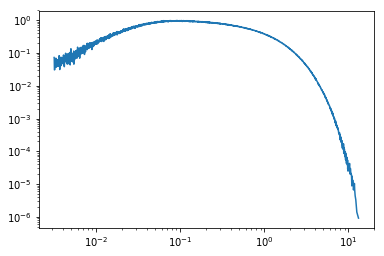

In [29]:
# contrast bins
# returns the normalised density ratio distribution, i.e. rho/<rho>
id=104
cont = pa.conbin(mfiles[id])
plt.loglog(cont[:,0],cont[:,1])
plt.show()

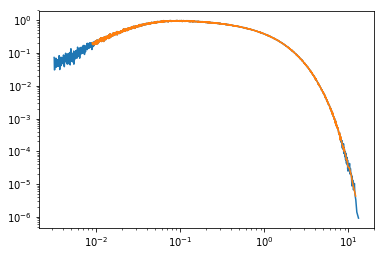

In [30]:
# additional argument is the minimum number of bins [otherwise they are grouped]
cont2 = pa.conbin(mfiles[id],100)
plt.loglog(cont[:,0],cont[:,1])
plt.loglog(cont2[:,0],cont2[:,1])
plt.show()

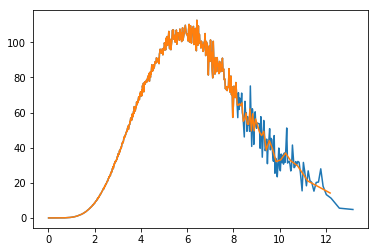

In [31]:
plt.plot(cont[:,0],(cont[:,0]**6)*cont[:,1])
plt.plot(cont2[:,0],(cont2[:,0]**6)*cont2[:,1])
plt.show()

In [32]:
# normalised a powerspectrum to become dimensionless variance
# needs as input the nmodes
N = pa.gm(mfiles[id],'Size')
L = pa.gm(mfiles[id],'L')
nmodes = pa.phasespacedensityBOX(N)
avdens = pa.gm(mfiles[id],'eA')
diva = pa.normalisePspectrum(pa.gm(mfiles[id],'psp'), nmodes, avdens, N, L)

28


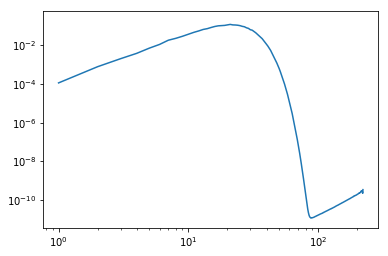

In [33]:
plt.loglog(diva)
plt.show()

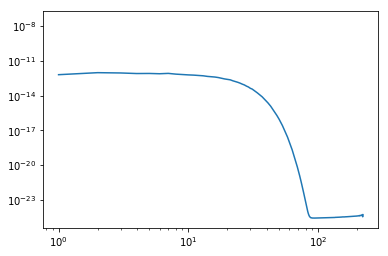

In [34]:
plt.clf()
plt.loglog(pa.gm(mfiles[id],'psp')/nmodes)
plt.show()